In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [7]:
a=pd.read_csv('train_E6oV3lV.csv')

In [8]:
print(a.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [9]:
elon1=pd.read_csv("elonmusk_tweets.csv")
del elon1['created_at']
elon1 = elon1.rename({'text': 'tweet'}, axis=1) 


In [10]:
trump1=pd.read_csv('trump_tweets.csv')
del trump1['source']
trump1 = trump1.rename({'text': 'tweet'}, axis=1) 


In [11]:
random1=pd.read_csv('test_tweets_anuFYb8.csv')


In [12]:
import cv2

In [13]:
img=cv2.imread("trumphappy.jpg")
img1=cv2.imread("trumpsad.jpg")

In [14]:
print("enter 1 for elon musk tweet analysis")
print("enter 2 for donald trump analysis")
print("enter any number to get randon tweet")      
b=input("enter the dataset you want to analyse: ")
if b==1:
    b=elon1
elif b== 2:
    b=trump1
else:
    b=random1

enter 1 for elon musk tweet analysis
enter 2 for donald trump analysis
enter any number to get randon tweet
enter the dataset you want to analyse: 2


In [15]:
print(b.head())

      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [16]:
combi = a.append(b, ignore_index=True)
combi.shape

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(49159, 3)

In [17]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [18]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [19]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [20]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [21]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [22]:
token = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [23]:
token.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: tidy_tweet, dtype: object

In [24]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = token.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [25]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

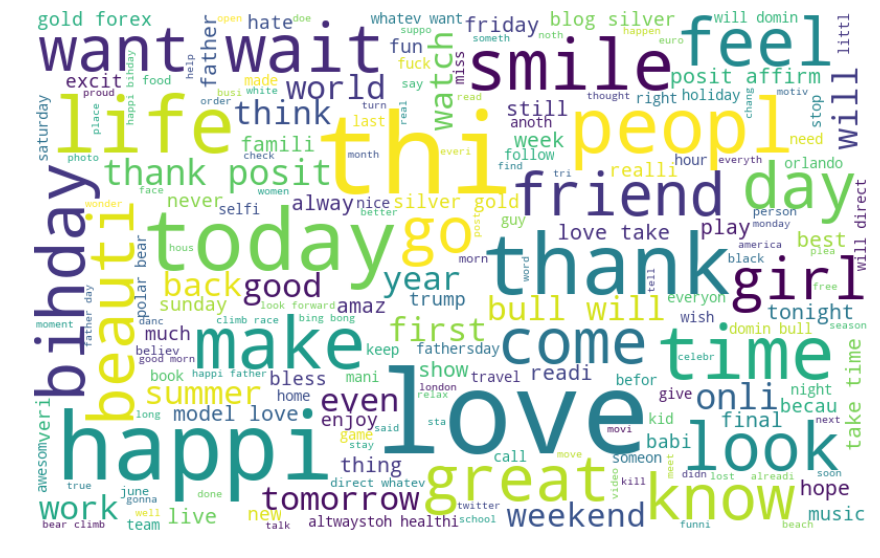

In [27]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

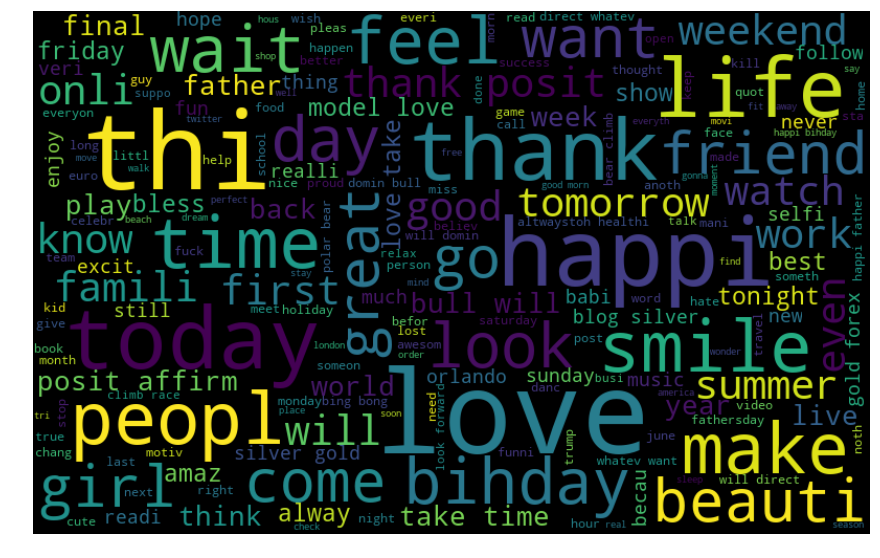

In [28]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

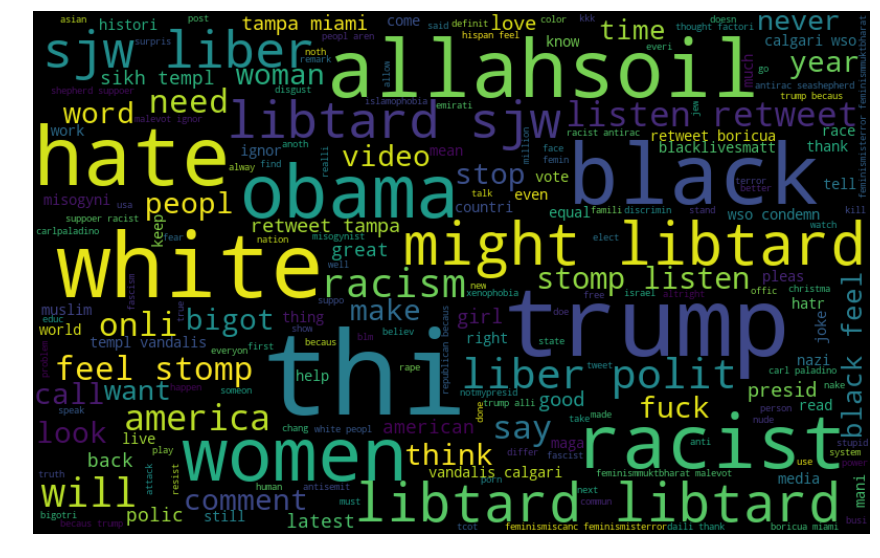

In [29]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [31]:
ht_positive= hashtag_extract(combi['tidy_tweet'][combi['label']==0])

In [32]:
ht_negative= hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [33]:
# unnesting list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

In [34]:
print(ht_positive)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'thank', 'posit', 'book

In [35]:
print(ht_negative)

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin', 'neverump', 'xenophobia', 'love', 'peac', 'race', 'ident', 'med', 'altright', 'whitesupremaci', 'linguist', 'race', 'power', 'raciolinguist', 'brexit', 'peopl', 'trump', 'republican', 'michelleobama', 'knick', 'golf', 'jewishsupremacist', 'libtard', 'sjw', 'liber', 'polit', 'trash', 'hate', 'stereotyp', 'prejudic', 'hope', 'hate', 'conflict', 'pol', 'bluelivesmatt', 'draintheswamp', 'ferguson', 'antisemit', 'hocoschool', 'columbiamd', 'hocomd', 'nazi', 'hatr', 'bigotri', 'libtard', 'sjw', 'liber', 'polit', 'fyi', 'tcot', 'topoli', 'blacklivesmatt', 'ushistori', 'eugen', 'biher', 'bigotri', 'altright', 'potu', 'theresist', 'crime', 'offic', 'black', 'retweet', 'tampa', 'miami', 'allahsoil', 'prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip', 'bigot', 'blacklivesmatt', 'feminismiscanc', 'feminismisterror', 'feminismmuktbharat', 'malevot', 'prowar', 'anti', 'islam',

In [36]:
import seaborn as sns
import nltk

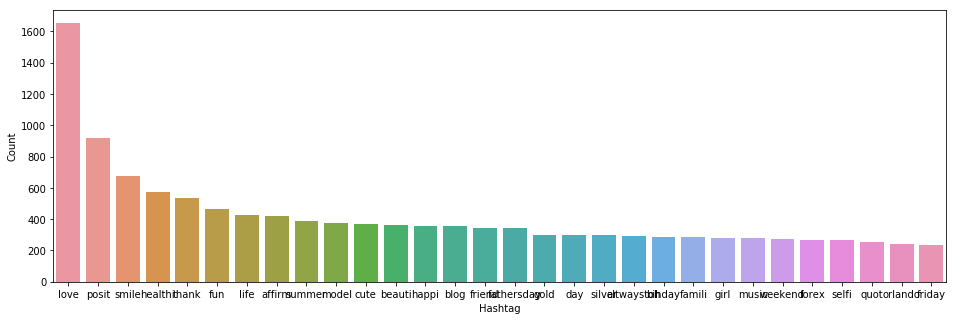

In [37]:
f = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count': list(f.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

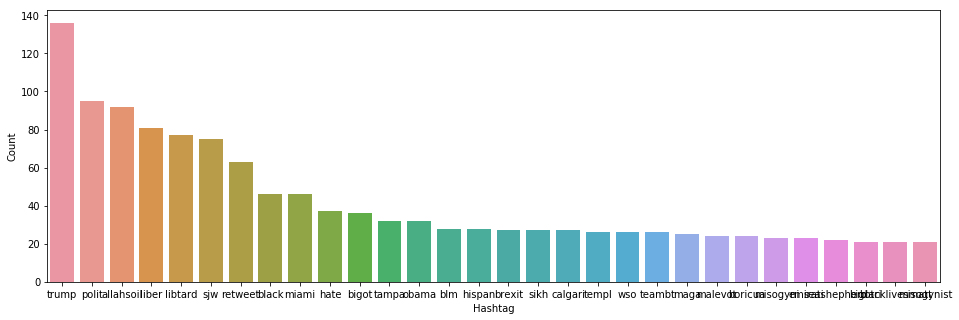

In [38]:
f = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count': list(f.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [39]:
if ht_positive> ht_negative:
    e=1
    print('account is not a spam account')
else:
    e=2
    print('account should be blocked')

account is not a spam account


In [42]:
if  e==1:
    cv2.imshow("happy ",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
elif e==2:
    cv2.imshow("sad", img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    